In [25]:
import pandas as pd
import time as time 
import numpy as np
import datetime as dt

In [36]:
def data():
    
    theta_m = pd.read_csv('/Users/guapofish/Desktop/Factor Investing/monthly_score.csv')
    final_q = pd.read_csv('/Users/guapofish/Desktop/Factor Investing/FinalQ.csv')
    data = final_q.dropna()
    data['date'] = pd.to_datetime(data['date'])
    theta_m['time'] = pd.to_datetime(theta_m['time'])
    theta_m.rename(columns={'time':'date'}, inplace=True)
    
    df = pd.read_csv('/Users/guapofish/Desktop/Factor Investing/winsor_factors_univariate.csv') 
    list_of_factors = ['b_m', 'e_p', 'cf_p', 'o', 'no', 'i_a', 'noa', 'pia', 'ig', 'nsi', 'ivg', 'ivc', 'oa', 'poa', 'pta', 'gpa',
               'oc_a', 'ol', 'R6', 'R11', 'sue', 'roe', 'roa', 'nei']
    tc = False
    if tc:
        # if self.tc == True 
        factors = df[['date', 'PERMNO', 'gvkey', 'equity', 'forward_r', 'fr'] + list_of_factors]
    else:
        factors = df[['date', 'PERMNO', 'gvkey', 'equity', 'forward_r'] + list_of_factors]
        
    
    factors_list = factors.columns
    theta_list = theta_m.columns
    diff = []
    for item in factors_list:
        if item not in theta_list:
            diff.append(item)
    diff.remove('gvkey')
    factors_new = factors.drop(diff, axis=1).dropna()
    ttime = pd.to_datetime(theta_m['date'].iloc[68])
    #ttime == Timestamp('1980-01-31 00:00:00')
    factors_new['date']= pd.to_datetime(factors_new['date'])
    
    theta_m = theta_m[(theta_m['date'] >= ttime)]
    factors_new = factors_new[(factors_new['date'] >= ttime)]

    return theta_m,factors_new 


In [7]:
def ticker_score(x):
    theta_m,factors_new = data()
    date_u = factors_new['date'].unique()
    grouped_date = factors_new.groupby(['date'])
    
    #calculte the Nt; N numbers of the sercuity in the portfolio at time t 
    Nt = []
    for item in date_u:
        f = grouped_date.get_group((item))
        Nt.append(len(f))
    
    
    #calculate the score for the specific gvkey/ticker 
    theta_date = []
    for i in range(len(theta_m['date'])):
        m = (theta_m['date'].iloc[i]).month
        y = (theta_m['date'].iloc[i]).year
        theta_date.append((m,y))
    
    s = []
    grouped = factors_new.groupby(['gvkey'])
    table_x = grouped.get_group((x))
    df = pd.DataFrame(columns=['Date', 'Score'])
    for i in range(len(table_x['gvkey'])):
        m = (table_x['date'].iloc[i]).month
        y = (table_x['date'].iloc[i]).year
        if (m,y) in theta_date:
            index = theta_date.index((m,y))
            s.append(sum(theta_m.iloc[index][2:]*table_x.iloc[i][3:])/Nt[index])
            #print ('the security score at time 0{}/{} is {}'.format(m,y,s[i]))
            aux = pd.DataFrame({'Date': [str(m) + '/' + str(y)],'Score': s[i]})
            frames = [df,aux]
            df = pd.concat(frames)
    
    df_new = df.set_index('Date')
    return df_new
 
  
  

In [15]:
# len(list(factors_new.gvkey.unique())) #2468
test_set = list(factors_new.gvkey.unique())[:10]
df['Score'] = ticker_score(test_set[0])['Score']
for i in range(len(test_set)):
    df['Score'] = ticker_score(test_set[i])['score']
    df['Score'+str(i)] = ticker_score(test_set[1])



/Users/guapofish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/guapofish/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [34]:
df1['Score2'] = df2['Score']
df1;

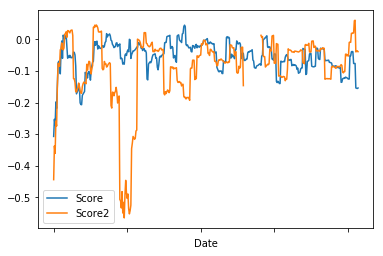

In [23]:
import matplotlib.pyplot as plt
df1.plot(y=["Score","Score2"])
plt.show()


In [2]:
theta_m = pd.read_csv('/Users/guapofish/Desktop/Factor Investing/monthly_score.csv')
final_q = pd.read_csv('/Users/guapofish/Desktop/Factor Investing/FinalQ.csv')
data = final_q.dropna()
data['date'] = pd.to_datetime(data['date'])
theta_m['time'] = pd.to_datetime(theta_m['time'])
theta_m.rename(columns={'time':'date'}, inplace=True)
    
df = pd.read_csv('/Users/guapofish/Desktop/Factor Investing/winsor_factors_univariate.csv') 
list_of_factors = ['b_m', 'e_p', 'cf_p', 'o', 'no', 'i_a', 'noa', 'pia', 'ig', 'nsi', 'ivg', 'ivc', 'oa', 'poa', 'pta', 'gpa',
               'oc_a', 'ol', 'R6', 'R11', 'sue', 'roe', 'roa', 'nei']
tc = False
if tc:
    # if self.tc == True 
    factors = df[['date', 'PERMNO', 'gvkey', 'equity', 'forward_r', 'fr'] + list_of_factors]
else:
    factors = df[['date', 'PERMNO', 'gvkey', 'equity', 'forward_r'] + list_of_factors]
        
    
    

/Users/guapofish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/guapofish/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
factors_list = factors.columns
theta_list = theta_m.columns
diff = []
for item in factors_list:
    if item not in theta_list:
        diff.append(item)
diff.remove('gvkey')
factors_new = factors.drop(diff, axis=1).dropna()
ttime = pd.to_datetime(theta_m['date'].iloc[68])
#ttime == Timestamp('1980-01-31 00:00:00')
factors_new['date']= pd.to_datetime(factors_new['date'])

In [4]:
factors_new


,date,gvkey,b_m,e_p,cf_p,o,no,i_a,noa,pia,...,pta,gpa,oc_a,ol,R6,R11,sue,roe,roa,nei
8713,1973-10-31,1919.0,0.194239,0.108544,0.122035,-0.008294,-0.008845,0.021189,0.779805,0.034265,...,0.743565,0.492429,0.038079,1.378008,0.123288,-0.136842,2.632011,0.050150,0.025089,6.0
8741,1973-10-31,2787.0,0.888020,0.105951,0.144078,0.036302,0.036302,0.131094,0.872283,0.116550,...,0.586851,0.380371,0.051651,1.032773,0.139785,0.164835,2.508460,0.023575,0.016611,6.0
8764,1973-10-31,3492.0,0.503589,0.082573,0.098511,0.025649,0.018782,0.101995,0.699603,0.024823,...,0.723447,0.472375,0.111096,1.006545,-0.018519,-0.116667,1.224745,0.034831,0.023125,6.0
8778,1973-10-31,3851.0,0.545234,0.065256,0.142597,0.009814,0.008157,0.162955,0.623984,0.207262,...,0.949133,0.379076,0.021520,0.930538,-0.193613,-0.077626,1.058475,0.031593,0.019188,6.0
8843,1973-10-31,5605.0,0.197309,0.039601,0.053538,0.015520,0.004446,0.144377,0.791034,-0.035454,...,1.509080,0.616030,0.046946,1.176630,0.191214,0.038288,0.190284,0.064650,0.028833,6.0
8857,1973-10-31,6148.0,2.379436,0.199426,0.330284,0.000000,0.000000,0.144355,0.745010,0.097016,...,0.792817,0.378756,0.024619,2.492043,-0.066667,-0.232877,0.178127,0.028236,0.015761,6.0
8866,1973-10-31,6386.0,0.612666,0.102845,0.123454,0.026525,0.026525,0.157292,0.742254,0.033876,...,0.771159,0.460131,-0.041574,0.786519,0.190476,-0.013158,3.493632,0.063085,0.043035,6.0
8886,1973-10-31,6979.0,0.319035,0.051748,0.068970,0.012476,0.011402,0.187532,0.662255,0.165681,...,0.809190,0.781326,0.085548,4.739206,0.059091,-0.068000,0.205557,0.034769,0.017994,6.0
8901,1973-10-31,7174.0,0.347368,0.067970,0.108362,0.011106,0.011106,0.102895,0.731413,0.125453,...,1.594742,0.343206,0.018289,1.882809,0.114667,0.357143,-0.078038,0.043024,0.020600,0.0
8905,1973-10-31,7260.0,1.939888,0.187772,0.173353,0.059425,0.027622,-0.111308,0.449400,-0.088501,...,-1.013721,0.446363,-0.012761,0.839877,-0.242187,-0.448864,-0.049271,0.015440,0.006910,0.0


In [5]:
theta_m

,date,b_m,e_p,cf_p,o,no,i_a,noa,pia,ig,...,pta,gpa,oc_a,ol,R6,R11,sue,roe,roa,nei
0,1974-05-31,1.250000e+18,-6.640000e+18,-2.590000e+17,-3.200000e+18,-2.510000e+18,-1.600000e+18,1.780000e+18,-2.120000e+18,-4.300000e+17,...,-1.850000e+18,6.680000e+16,1.240000e+18,3.230000e+18,-8.810000e+17,-1.470000e+18,-2.970000e+18,-5.100000e+17,2.240000e+18,1.460000e+18
1,1974-06-28,-2.580000e+18,1.150000e+19,-1.340000e+19,-3.460000e+19,-3.440000e+18,1.280000e+19,1.840000e+19,-7.820000e+18,-1.170000e+19,...,-3.440000e+18,-1.910000e+18,-5.090000e+18,-1.330000e+19,6.320000e+18,-2.810000e+17,2.330000e+19,-1.060000e+19,-5.170000e+18,-4.370000e+18
2,1974-07-31,-6.780000e+16,1.390000e+17,-4.360000e+17,1.740000e+18,-3.520000e+16,-2.370000e+17,-2.960000e+17,1.880000e+17,4.710000e+17,...,1.550000e+17,-5.320000e+16,-1.330000e+17,-3.350000e+17,2.470000e+16,-3.120000e+17,1.280000e+17,9.120000e+16,-1.090000e+17,4.020000e+17
3,1974-08-30,-5.180000e+17,6.860000e+17,-3.100000e+16,3.810000e+17,6.550000e+17,5.770000e+17,3.290000e+16,-3.800000e+16,-2.660000e+17,...,-6.690000e+17,-2.790000e+17,-5.140000e+17,3.290000e+17,1.660000e+17,-1.970000e+16,4.870000e+17,-6.740000e+17,1.280000e+18,2.660000e+17
4,1974-09-30,1.630000e+17,-4.780000e+17,5.110000e+17,1.840000e+17,1.020000e+18,8.640000e+17,7.560000e+17,3.330000e+17,-3.980000e+18,...,6.360000e+17,-3.250000e+17,1.800000e+18,-1.120000e+18,1.420000e+17,4.970000e+17,6.300000e+17,-4.460000e+17,2.150000e+17,-6.030000e+17
5,1974-10-31,1.880000e+16,-2.410000e+16,1.360000e+17,2.210000e+17,-2.260000e+17,2.150000e+17,3.340000e+17,1.520000e+17,-6.820000e+17,...,1.900000e+17,2.635810e+13,3.990000e+17,-2.900000e+17,-1.310000e+17,6.940000e+16,2.320000e+17,2.260000e+17,-1.650000e+17,-2.450000e+17
6,1974-11-29,3.250000e+16,-1.100000e+17,-4.660000e+16,-1.550000e+17,-4.305860e+15,4.200000e+16,9.410000e+16,2.160000e+16,2.800000e+17,...,-1.320000e+17,6.030000e+16,-8.630000e+16,-2.870000e+16,2.430000e+16,5.670000e+16,-1.110000e+17,5.740000e+16,-5.710000e+16,-2.040000e+17
7,1974-12-31,6.110000e+16,3.240000e+16,-1.590000e+17,1.820000e+17,-2.180000e+16,8.670000e+16,1.230000e+17,-3.560000e+17,-3.390000e+17,...,-2.490000e+16,-1.900000e+16,1.650000e+17,8.100000e+16,8.760000e+16,-8.370000e+16,-1.210000e+16,-4.060000e+16,-5.640000e+16,2.040000e+17
8,1975-01-31,-1.480000e+17,1.830000e+17,1.550000e+17,-4.380000e+16,8.370000e+16,1.330000e+17,-4.870000e+17,-8.480000e+16,-3.240000e+17,...,2.910000e+17,-3.110000e+17,8.550000e+16,-4.090000e+17,3.690000e+17,-2.140000e+17,4.270000e+17,5.730000e+16,9.700000e+16,-1.820000e+17
9,1975-02-28,4.457650e+15,-6.923470e+15,-1.390000e+16,-5.755250e+15,5.471270e+15,-3.280000e+16,2.900000e+16,-4.250000e+16,4.620000e+16,...,2.169850e+15,-1.740000e+16,4.703180e+15,1.760000e+16,4.758420e+15,-2.130000e+16,1.220000e+16,-8.237960e+15,2.440000e+16,-1.670000e+16


In [10]:
theta_m,factors_new = data()
date_u = factors_new['date'].unique()
grouped_date = factors_new.groupby(['date'])
    
    #calculte the Nt; N numbers of the sercuity in the portfolio at time t 
Nt = []
for item in date_u:
    f = grouped_date.get_group((item))
    Nt.append(len(f))

/Users/guapofish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/guapofish/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [29]:
factors_new


,date,gvkey,b_m,e_p,cf_p,o,no,i_a,noa,pia,...,pta,gpa,oc_a,ol,R6,R11,sue,roe,roa,nei
8713,1973-10-31,1919.0,0.194239,0.108544,0.122035,-0.008294,-0.008845,0.021189,0.779805,0.034265,...,0.743565,0.492429,0.038079,1.378008,0.123288,-0.136842,2.632011,0.050150,0.025089,6.0
8741,1973-10-31,2787.0,0.888020,0.105951,0.144078,0.036302,0.036302,0.131094,0.872283,0.116550,...,0.586851,0.380371,0.051651,1.032773,0.139785,0.164835,2.508460,0.023575,0.016611,6.0
8764,1973-10-31,3492.0,0.503589,0.082573,0.098511,0.025649,0.018782,0.101995,0.699603,0.024823,...,0.723447,0.472375,0.111096,1.006545,-0.018519,-0.116667,1.224745,0.034831,0.023125,6.0
8778,1973-10-31,3851.0,0.545234,0.065256,0.142597,0.009814,0.008157,0.162955,0.623984,0.207262,...,0.949133,0.379076,0.021520,0.930538,-0.193613,-0.077626,1.058475,0.031593,0.019188,6.0
8843,1973-10-31,5605.0,0.197309,0.039601,0.053538,0.015520,0.004446,0.144377,0.791034,-0.035454,...,1.509080,0.616030,0.046946,1.176630,0.191214,0.038288,0.190284,0.064650,0.028833,6.0
8857,1973-10-31,6148.0,2.379436,0.199426,0.330284,0.000000,0.000000,0.144355,0.745010,0.097016,...,0.792817,0.378756,0.024619,2.492043,-0.066667,-0.232877,0.178127,0.028236,0.015761,6.0
8866,1973-10-31,6386.0,0.612666,0.102845,0.123454,0.026525,0.026525,0.157292,0.742254,0.033876,...,0.771159,0.460131,-0.041574,0.786519,0.190476,-0.013158,3.493632,0.063085,0.043035,6.0
8886,1973-10-31,6979.0,0.319035,0.051748,0.068970,0.012476,0.011402,0.187532,0.662255,0.165681,...,0.809190,0.781326,0.085548,4.739206,0.059091,-0.068000,0.205557,0.034769,0.017994,6.0
8901,1973-10-31,7174.0,0.347368,0.067970,0.108362,0.011106,0.011106,0.102895,0.731413,0.125453,...,1.594742,0.343206,0.018289,1.882809,0.114667,0.357143,-0.078038,0.043024,0.020600,0.0
8905,1973-10-31,7260.0,1.939888,0.187772,0.173353,0.059425,0.027622,-0.111308,0.449400,-0.088501,...,-1.013721,0.446363,-0.012761,0.839877,-0.242187,-0.448864,-0.049271,0.015440,0.006910,0.0


In [37]:
theta_m,factors_new = data()

/Users/guapofish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/guapofish/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


In [40]:
df = factors_new.set_index('date')

In [41]:
df.to_csv('output.csv')

In [42]:
df

,gvkey,b_m,e_p,cf_p,o,no,i_a,noa,pia,ig,...,pta,gpa,oc_a,ol,R6,R11,sue,roe,roa,nei
date,,,,,,,,,,,,,,,,,,,,,
1980-01-31,1059.0,1.333580,0.174725,0.181417,0.049659,0.049587,0.128081,0.797913,0.088716,-0.648326,...,0.646869,0.560218,0.174553,1.562351,-0.071429,-0.121622,1.325178,0.034463,0.019553,7.0
1980-01-31,1078.0,0.404489,0.076604,0.094025,0.027263,0.024164,0.189965,0.838398,0.084207,0.302879,...,0.698957,0.450825,0.024260,0.791434,0.205128,0.227612,0.468985,0.062690,0.032330,8.0
1980-01-31,1104.0,0.435612,0.069729,0.085467,0.020187,0.020187,0.213028,0.955188,0.179559,-0.023677,...,0.904063,0.447499,0.070925,1.145777,0.106383,0.155556,0.303488,0.040918,0.021458,8.0
1980-01-31,1118.0,1.579851,0.181606,0.216590,0.010698,0.010698,-0.028960,0.604779,0.042636,0.140363,...,0.679467,0.964095,0.427709,2.567612,0.032258,0.032258,-0.629713,0.011936,0.006391,0.0
1980-01-31,1135.0,0.210306,0.018815,0.039877,0.003326,0.001396,0.554010,1.197329,0.535917,-0.191593,...,1.751649,0.141335,0.006239,0.185146,0.479339,1.468966,2.898275,0.036263,0.018483,8.0
1980-01-31,1209.0,0.648288,0.089086,0.184409,0.016783,0.013151,0.194588,0.718191,0.189175,0.231192,...,0.909104,0.398137,0.014462,0.673313,0.190283,0.413462,3.610654,0.043714,0.021855,8.0
1980-01-31,1247.0,0.696300,0.077288,0.137983,0.013388,0.013388,0.164840,0.896184,0.134470,-0.581943,...,1.084646,0.450774,0.035053,1.224799,0.480000,1.094340,0.419685,0.021556,0.012446,2.0
1980-01-31,1343.0,1.144462,0.247478,0.277941,0.144586,0.133311,0.200052,0.958108,0.220577,0.856770,...,0.125319,0.479691,0.020526,2.131094,0.048077,0.297619,-0.323098,0.034861,0.022868,0.0
1980-01-31,1362.0,1.422781,0.003650,0.048162,0.032274,0.032274,0.154679,0.847656,0.054876,-0.329663,...,-3.525792,0.167779,0.012685,0.699338,0.436242,0.573529,0.564596,0.015565,0.007294,5.0
